# **PA 01: k-NN Classification** 

### Instructions


*   The aim of this assignment is to give you hands-on experience with a real-life
machine learning application.
*   You will be implementing a kNN-based digit classifier.
*   You must use the Python programming language.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment1. Zip these files in a folder and name
the folder Name_RollNo_Assignment1. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**

### Introduction

The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You will be training a k-NN model and using it to classify images of handwritten digits from the famous **MNIST dataset**, which contains 70,000
images of digits and their respective labels. You will first implement the code from scratch and then replicate the entire code using the scikit-learn library.

## **Part 1: Implement from Scratch (75 marks)**

You are not allowed to use scikit-learn or any other machine learning toolkit for this
part. You have to implement your own k-NN classifier from scratch. You may use
Pandas, NumPy, Matplotlib, Seaborn, and other standard Python libraries.

### Importing Libraries

In [ ]:
# Importing relevant libraries. You may add other libraries if needed (except scikit-learn or any other machine learning toolkit)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Loading Dataset

The MNIST dataset consists of 70,000 labelled images of handwritten digits, each of size 28 pixels by 28 pixels. 

The dataset given to you is in a CSV file. The CSV file has 70,001 rows and 785 columns. Each row represents one image of a handwritten digit.
The first row indicates what each column means (Print the loaded dataset to understand this). You should remove this row when creating the dataset. 
The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

For quicker computation, you will sample 20% of the entire dataset.

You can use the Pandas library to load the CSV file but the final dataset should be stored in a Numpy array of shape (14000, 785).

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from the folder on Drive where you have saved the dataset. Path will be like "/content/drive/..." 

#########################

# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/mnist.csv")
df2 = df.iloc[1:, :] 
#########################

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [ ]:
# Sample 20% of the dataset. Please note that this is not the train-test split. This is just a sample of the dataset. We are doing this to reduce the computation time.

#########################

twenty_percent = int(20/100 * df.shape[0])
df3 = df2.iloc[0:twenty_percent, :] # getting 20% sub dataset

# Separating labels and images

x = df3.iloc[:, 1:]
y = df3.iloc[:, 0]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)



x1 = x.values.reshape(x.shape[0], 28, 28).astype(np.float64)
y1 = y.values.reshape(y.shape[0], 1).astype(np.float64)
print("Shape of 20% dataset:", df3.shape)
#########################

Shape of x: (14000, 784)
Shape of y: (14000,)
Shape of 20% dataset: (14000, 785)


In [ ]:
# Implement a function to display an image from your loaded dataset given the image index. 
# You can use the Pillow library for this purpose.

def display_image(image_ind):
  plt.imshow(x1[image_ind])
  plt.show()

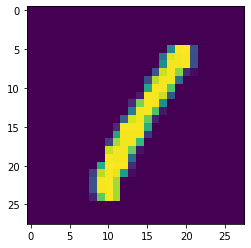

In [ ]:
# Now you can display different images to visualize them

display_image(3)

Now divide the dataset into training and test sets (around an 85-15 split).
More precisely, take the first 11900 images for the training set and the last 2100 for the test set.

Both the resulting splits/sets should be stored in Numpy arrays of shape (num_split_images, 785).
Depending on your approach, you can also separate the labels into a different array (or two arrays).

In [ ]:
# Train-test split

#########################

# Splitting to train and test

x_train = x1[0:11900]
y_train = y1[0:11900]
x_test = x1[11900:-1]
y_test = y1[11900:-1]

#########################

### Implementing k-NN Classifier

Now you need to implement all of the tasks that follow.

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

**Euclidean Distance:**

$$
d(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

**Manhattan Distance:**

$$
d(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [ ]:
# Implement functions for Euclidean and Manhattan distances

#########################
def eucl_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def man_dist(x1, x2):
    return np.sum(np.abs((x1-x2)))

#########################

Next, create your own k-Nearest Neighbors classifier function by performing the following
tasks:
1. For a test data point, find its distance from all training
instances.
2. Sort the calculated distances in ascending order based on distance values.
3. Choose k training samples with minimum distances from the test data point.
4. Return the most frequent class of these samples. (Your function should work
with Euclidean distance as well as Manhattan distance. Pass the distance
metric as a parameter in the k-NN classifier function. Your function should
also be general enough to work with any value of k.)

For values of k where a tie occurs, you need to break the tie by backing off to the k-1 value. In case there is still a tie, you will continue decreasing k until there is a clear winner.

In [ ]:
# Implement k-Nearest Neighbors classifier function
# Feel free to make any helper functions to assist you and to make the code modular

#########################

# KNN for single image
def KNN(x_train, y_train , test, k, distance):

  dis = []
  k_dis = []
  for i in x_train:
    if distance == "Euclidean":
      dis.append(eucl_dist(i, test))
    else:
      dis.append(man_dist(i, test))

  for i in range(0, k):
    min = np.argmin(dis)
    dis.pop(min)
    k_dis.append(y_train[min][0])
  


  return max(set(k_dis),key=k_dis.count), k_dis

# Knn for the whole test dataset
def KNN_multiple(x_train, y_train, x_test, k, distance):
  if k > x_train.shape[0]:
    k = x_train.shape[0] - 1

  predict = []
  for i in x_test:
    min = KNN(x_train, y_train, i, k , distance)
    predict.append(min[0])
  return predict

#########################

Next, implement an evaluation function that calculates the confusion matrix, classification accuracy and macro-average F1
score of your classifier. The function should take as input the predicted labels and the true labels. 

We recommend that you do not use hard coding in this function. Try it at your own risk :p

In [ ]:
# Implement evaluation function

#########################

def eval(predict, actual, show_matrix = False, show_heat_map = False, distance="Euclidean"):

  # Confusion matrix.
  data = {'0': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          '3': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '5': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          '6': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '8': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          '9': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

  data2 = {"Accuracy": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Precision': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'Recall': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'F1_score': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


  df = pd.DataFrame(data)  

  # Metrics for each classification.

  TP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  TN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  FN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  FP = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  Accuracy  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Precision  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Recall = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  F1_score = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  count = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

  # Calculating metrics for given dataset

  for i in range(0, len(actual)):
    if int(predict[i]) == int(actual[i]):
      value = df.loc[int(predict[i]), [str(int(predict[i]))]][0] + 1

      df.loc[int(predict[i]), [str(int(predict[i]))]] = value + 1

    else:
      value = df.loc[int(actual[i]), [str(int(predict[i]))]][0] + 1
      df.loc[int(actual[i]), [str(int(predict[i]))]] = value + 1

  
  for i in range(0, 10):
    FP[i] = df.iloc[:,i].sum() - df.loc[i, [str(i)]][0]
    TP[i] = df.loc[i, [str(i)]][0]
    FN[i] = df.iloc[i,:].sum() - df.loc[i, [str(i)]][0]


    df2 = df.copy()
    df2 = df2.drop(i, axis=0)
    df2 = df2.drop(str(i), axis=1)
    TN[i] = df2.values.sum()
    df2 = df.copy()

    Accuracy[i] = (TP[i] + TN[i])/(TP[i]+TN[i]+FP[i]+FN[i])
    Precision[i] = TP[i]/(TP[i]+FP[i])
    Recall[i] = TP[i]/(TP[i]+FN[i])
    F1_score = (2*TP[i])/(2*TP[i]+FP[i]+FN[i])

  data2["Accuracy"] = Accuracy
  data2["Precision"] = Precision
  data2["Recall"] = Recall
  data2["F1_score"] = F1_score

  metrics = pd.DataFrame(data2)

  if show_matrix == True:
    print(metrics)

  if show_heat_map == True:
    s = sns.heatmap(df, annot=True, fmt='d')
    s.set(xlabel='Gold Labels', ylabel='Predicted Labels')
    s.set_title('Heat Map ' + distance)
    plt.show()

  return Accuracy, Precision, Recall, F1_score

######################### 

Next, implement a function that performs m-fold cross-validation on the training data for a specified value of k. (In cross-validation, you divide
the training data set into m parts. m-1 parts will be used for training and 1 part
will be used for validation. Then you will take a different part of your data as a
validation data set and train your algorithm on the rest of the data set.) 

The function should return predicted labels for the entire training data (size of list/array should be equal to the size of training dataset) for the specified value of k. This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your evaluation function together with the actual labels.

In [ ]:
# Implement function to perform m-fold cross-validation

#########################

# Enter your code here

def cross_valid(x_train, y_train, folds, k, distance="Euclidean"):

  if folds > x_train.shape[0]:
    return "X-folds cant be greater than data"

  all_pred = []
  
  for i in range(0, folds):
    print("Working on Fold:", i+1)
    test_start = int(x_train.shape[0]/folds * i)
    test_end = int(x_train.shape[0]/folds * (i + 1))

    train_array_1 = x_train[0:test_start, :]
    train_array_2 = x_train[test_end:-1, :]

    train_array = 0
    if train_array_1.shape[0] == 0:
      train_array = train_array_2
    elif train_array_2.shape[0] == 0:
      train_array = train_array_1
    
    else:
      train_array = np.concatenate([train_array_1, train_array_2])

    pred = KNN_multiple(x_train, y_train, x_train[test_start: test_end, :], k , distance)
    all_pred = all_pred + pred
  return all_pred
  
#########################

Now run your
cross-validation function on the training data using m = 5 for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do
this for both the Euclidean distance and the Manhattan distance for each value of
k. Also run your evaluation function for each value of k for both distance metrics and report confusion matrix, classification accuracy and F1 score.

Each confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.

Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


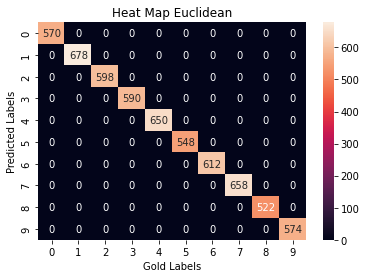

For k = 1
Accuracy = 1.0
F1_score = 1.0
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


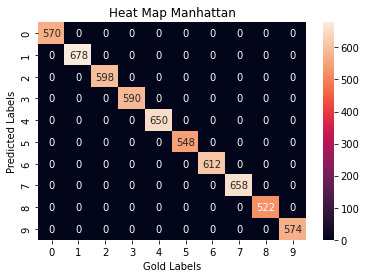

For k = 1
Accuracy = 1.0
F1_score = 1.0
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


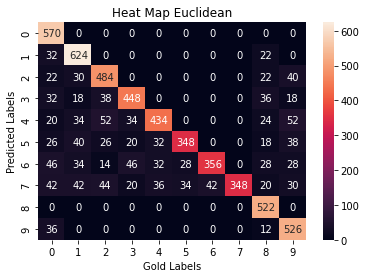

For k = 2
Accuracy = 0.9553333333333333
F1_score = 0.8055130168453293
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


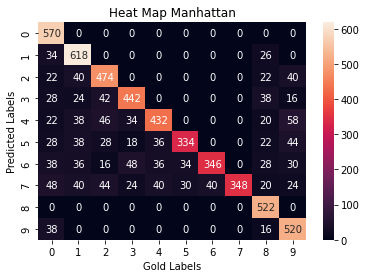

For k = 2
Accuracy = 0.9535333333333333
F1_score = 0.7963246554364471
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


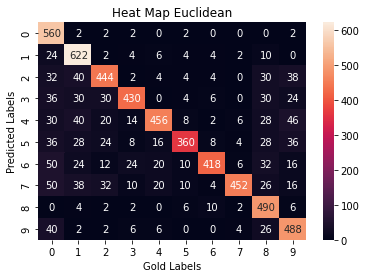

For k = 3
Accuracy = 0.9573333333333333
F1_score = 0.78330658105939
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


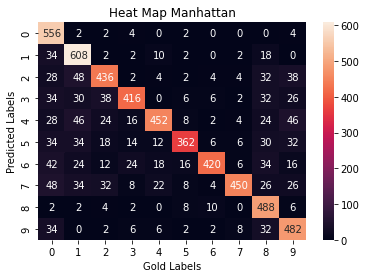

For k = 3
Accuracy = 0.9556666666666669
F1_score = 0.7712
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


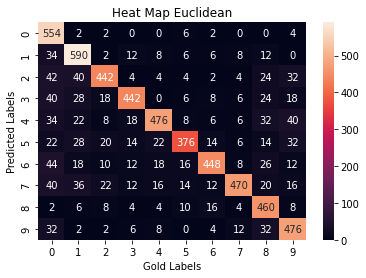

For k = 4
Accuracy = 0.9578000000000001
F1_score = 0.7854785478547854
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


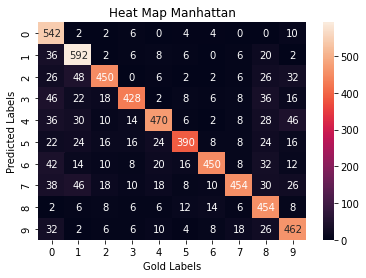

For k = 4
Accuracy = 0.9563999999999998
F1_score = 0.7674418604651163
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


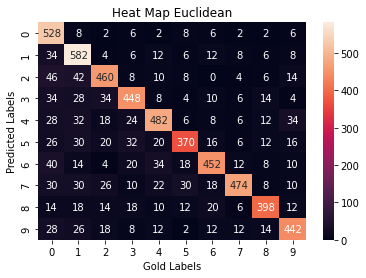

For k = 5
Accuracy = 0.9545333333333332
F1_score = 0.7823008849557522
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


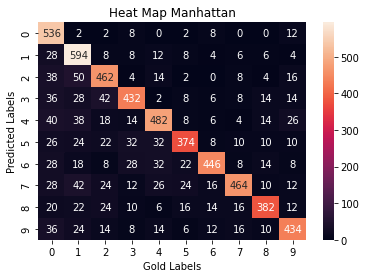

For k = 5
Accuracy = 0.9535333333333332
F1_score = 0.7736185383244206
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


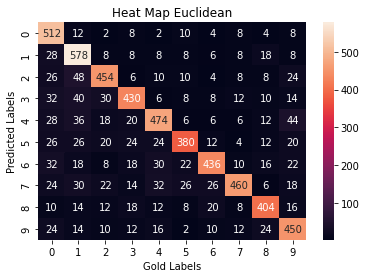

For k = 6
Accuracy = 0.9526
F1_score = 0.7512520868113522
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


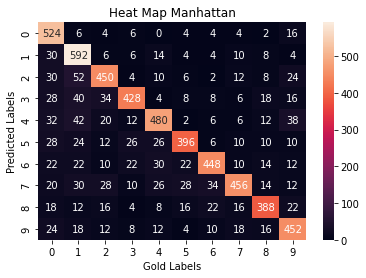

For k = 6
Accuracy = 0.9538
F1_score = 0.7661016949152543
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


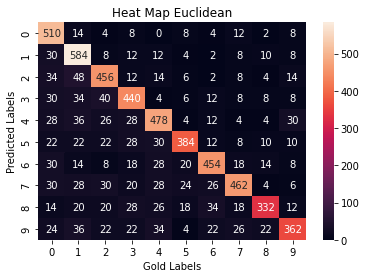

For k = 7
Accuracy = 0.9487333333333332
F1_score = 0.6961538461538461
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


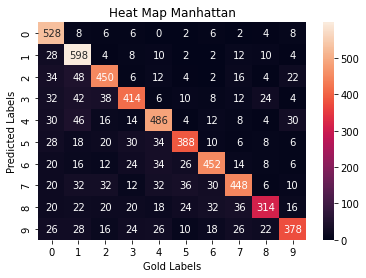

For k = 7
Accuracy = 0.9485333333333333
F1_score = 0.7145557655954632
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


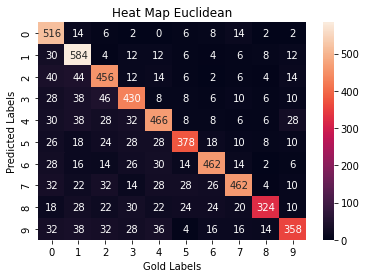

For k = 8
Accuracy = 0.9478666666666665
F1_score = 0.6924564796905223
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


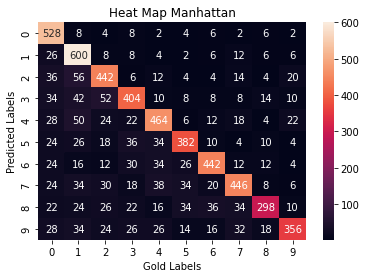

For k = 8
Accuracy = 0.9454
F1_score = 0.7021696252465484
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


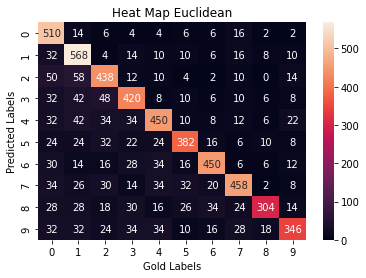

For k = 9
Accuracy = 0.9442
F1_score = 0.6797642436149313
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


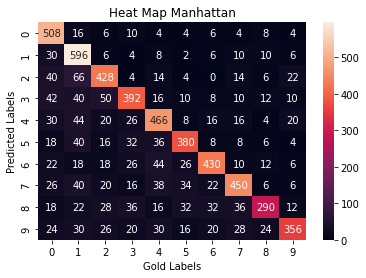

For k = 9
Accuracy = 0.9432
F1_score = 0.6980392156862745
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


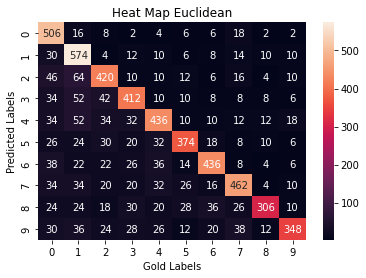

For k = 10
Accuracy = 0.9424666666666667
F1_score = 0.696
----------------------------------------------------------------------
Working on Fold: 1
Working on Fold: 2
Working on Fold: 3
Working on Fold: 4
Working on Fold: 5


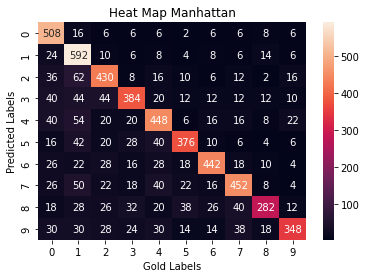

For k = 10
Accuracy = 0.9420666666666667
F1_score = 0.6904761904761905
----------------------------------------------------------------------


In [ ]:
# Perform 5-fold cross-validation and report evaluation metrics

#########################

Acc_eu = []
F1_eu = []
Pre_eu = []
Re_eu = []

Acc_man = []
F1_man = []
Pre_man = []
Re_man = []

# taking some few hours on full dataset but collab was stop working so taking small chunk.
x_train = x_train[0:3000]
y_train = y_train[0:3000]
x_test = x_test[0:3000]
y_test = y_test[0:3000]

for i in range(0, 10):
  all_pred = cross_valid(x_train, y_train, folds=5, k=i+1, distance="Euclidean")
  Accuracy, Precision, Recall, F1_score = eval(all_pred, actual=y_train, show_heat_map=True)
  print("For k =", i+1)
  print("Accuracy =", sum(Accuracy)/10)
  print("F1_score =", F1_score)
  print("----------------------------------------------------------------------")
  Acc_eu.append(np.sum(Accuracy)/10)
  F1_eu.append(np.sum(F1_score)/10)
  Pre_eu.append(np.sum(Precision)/10)
  Re_eu.append(np.sum(Recall)/10)

  all_pred2 = cross_valid(x_train, y_train, folds=5, k=i+1, distance="Manhattan")
  Accuracy, Precision, Recall, F1_score = eval(all_pred2, actual=y_train, distance="Manhattan", show_heat_map=True)
  print("For k =", i+1)
  print("Accuracy =", sum(Accuracy)/10)
  print("F1_score =", F1_score)
  print("----------------------------------------------------------------------")
  Acc_man.append(np.sum(Accuracy)/10)
  F1_man.append(np.sum(F1_score)/10)
  Pre_man.append(np.sum(Precision)/10)
  Re_man.append(np.sum(Recall)/10)
  
  

#########################

Next, present the results as a graph with k values on the x-axis and classification accuracy
on the y-axis. Use a single plot to compare the two versions of the classifier (one
using Euclidean and the other using Manhattan distance metric). Make another
graph but with the F1 score on the y-axis this time. The graphs should be properly
labeled.

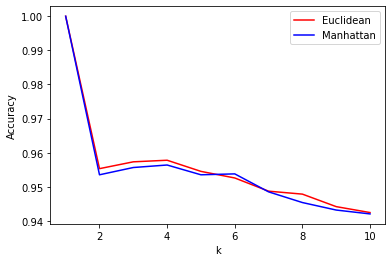

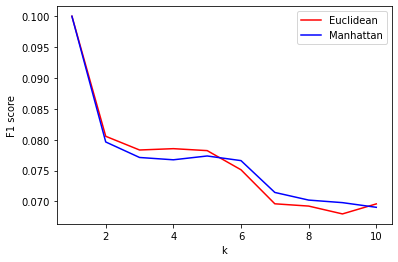

In [ ]:
# Draw the required plots

#########################
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, Acc_eu, color="red")
plt.plot(k, Acc_man, color="blue")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(["Euclidean", "Manhattan"])  
plt.show()


k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, F1_eu, color="red")
plt.plot(k, F1_man, color="blue")
plt.xlabel("k")
plt.ylabel("F1 score")
plt.legend(["Euclidean", "Manhattan"])
plt.show()

#########################

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?

In [ ]:
#########################

# k = 1 is the best

#########################

Finally, use the best value of k for both distance metrics and run it on the test
dataset. Find the confusion matrix, classification accuracy and F1 score and print
them. Keep in mind the earlier instructions about displaying confusion matrices.

In [ ]:
x_test.shape
y.shape

(2099, 1)

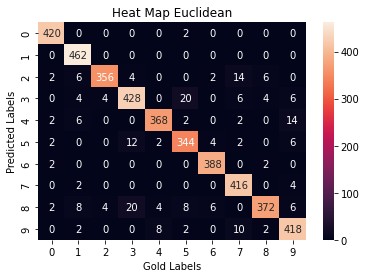

Euclidean Accuracy 0.989232968080038
Euclidean F1 Score 0.9330357142857143


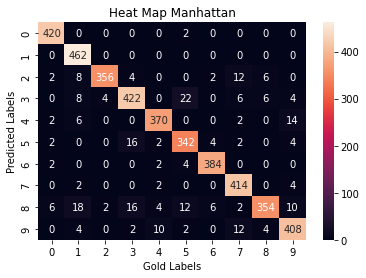

Manhattan Accuracy 0.9873272987136733
Manhattan F1 Score 0.9209932279909706


In [ ]:
# Use best values of k on test dataset

#########################

x_train = x1[0:11900]
y_train = y1[0:11900]
x_test = x1[11900:-1]
y_test = y1[11900:-1]


Euclidean_predict = KNN_multiple(x_train, y_train, x_test, k=1 , distance="Euclidean")
y = np.array(Euclidean_predict).reshape(len(Euclidean_predict), 1)
Accuracy, Precision, Recall, F1_score = eval(y, actual=y_test, show_heat_map=True)
print("Euclidean Accuracy", np.sum(Accuracy)/10)
print("Euclidean F1 Score", F1_score)


Manhattan_predict = KNN_multiple(x_train, y_train, x_test, k=1 , distance="Man")
y2 = np.array(Manhattan_predict).reshape(len(Manhattan_predict), 1)
Accuracy, Precision, Recall, F1_score = eval(y2, actual=y_test, distance="Manhattan", show_heat_map=True)
print("Manhattan Accuracy", np.sum(Accuracy)/10)
print("Manhattan F1 Score", F1_score)


#########################

## **Part 2: Implement using Scikit-Learn (25 marks)**

In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your
classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1
but this time using scikit-learn. Perform 5-fold cross-validation and run
the k-NN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean
and Manhattan distance. Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the
accuracy, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels. Also present
the results as a graph with k values on the x-axis and performance measures on the y-axis
just like you did in Part 1. Use a single plot to compare the two versions of the classifier
(one using Euclidean and the other using Manhattan distance metric). Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics.

Note that the confusion matrices must be displayed in the same way as in Part 1.

k = 1
Accuracy = 0.9248739495798319
F1-score = 0.9237213876307135


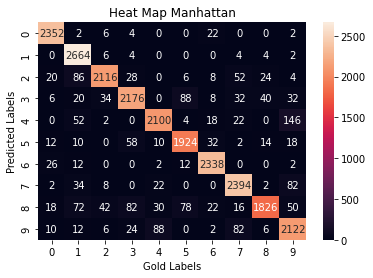

k = 2
Accuracy = 0.9109243697478991
F1-score = 0.908948746043527


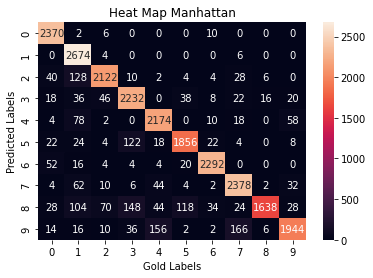

k = 3
Accuracy = 0.924453781512605
F1-score = 0.923569557819605


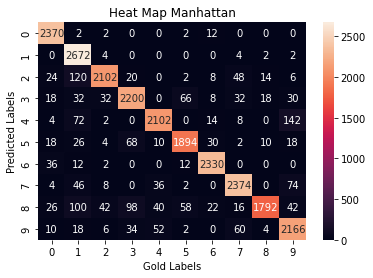

k = 4
Accuracy = 0.9210924369747899
F1-score = 0.920122684691913


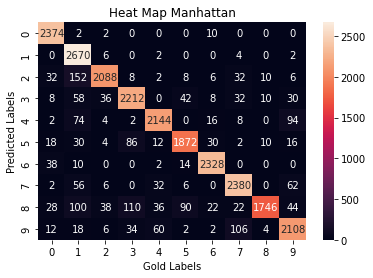

k = 5
Accuracy = 0.9210084033613445
F1-score = 0.9202819994505148


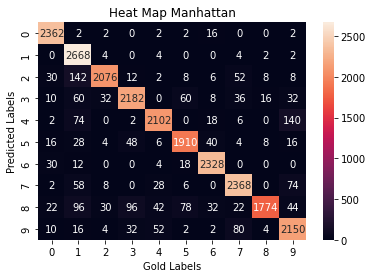

k = 6
Accuracy = 0.9173949579831933
F1-score = 0.9166603960885368


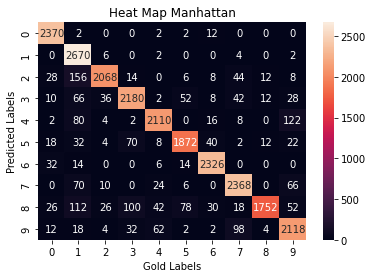

k = 7
Accuracy = 0.9178991596638656
F1-score = 0.9173045545641199


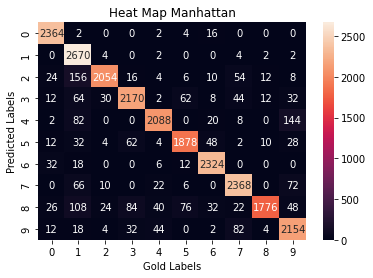

k = 8
Accuracy = 0.9163025210084034
F1-score = 0.9158481749369101


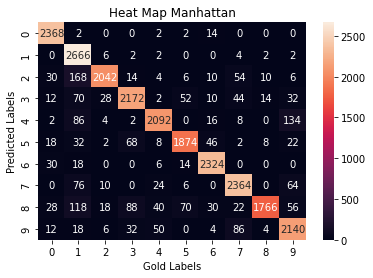

k = 9
Accuracy = 0.9153781512605041
F1-score = 0.9149855364400082


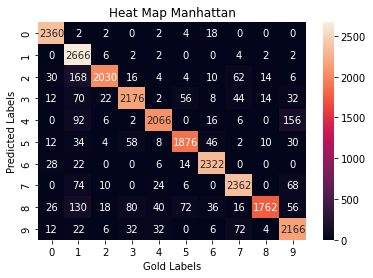

k = 10
Accuracy = 0.9146218487394958
F1-score = 0.9141814831510399


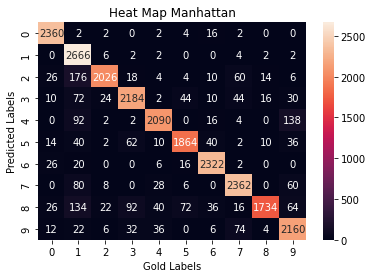

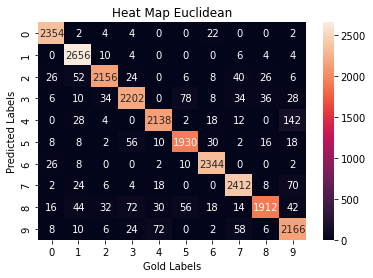

k = 1
Accuracy = 0.9357142857142857
F1-score = 0.9347322553852331


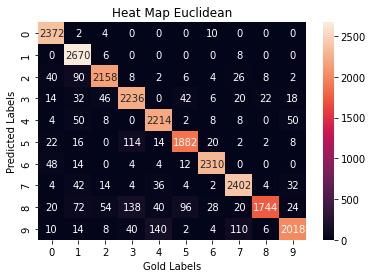

k = 2
Accuracy = 0.9246218487394958
F1-score = 0.9230338515264366


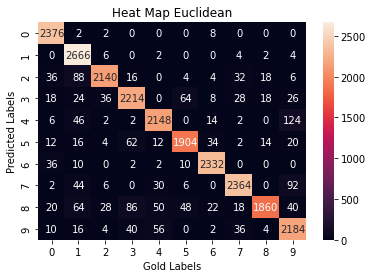

k = 3
Accuracy = 0.9322689075630252
F1-score = 0.931425085614235


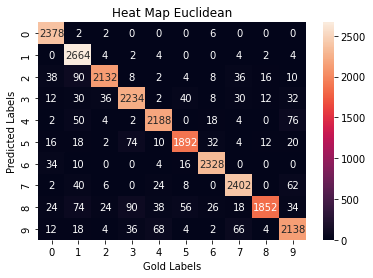

k = 4
Accuracy = 0.9331092436974789
F1-score = 0.9322165600592849


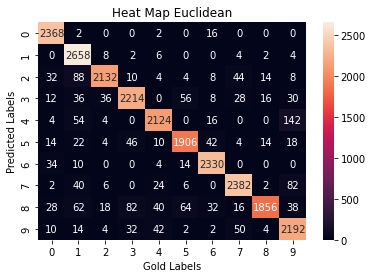

k = 5
Accuracy = 0.9311764705882353
F1-score = 0.9303501628658915


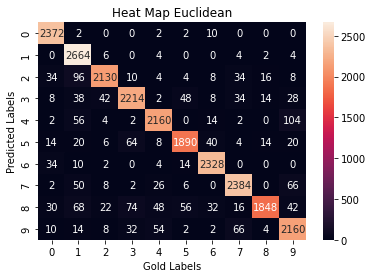

k = 6
Accuracy = 0.930672268907563
F1-score = 0.9298209868217271


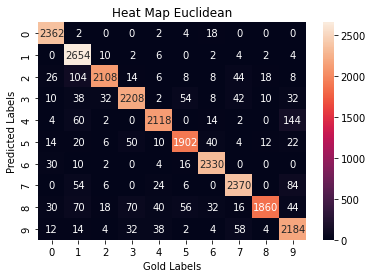

k = 7
Accuracy = 0.9284033613445378
F1-score = 0.9277845896006409


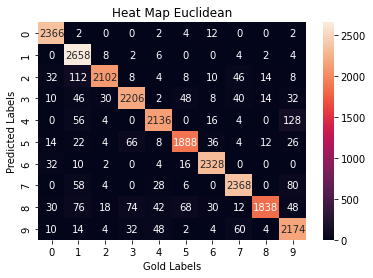

k = 8
Accuracy = 0.9270588235294117
F1-score = 0.9263477390640386


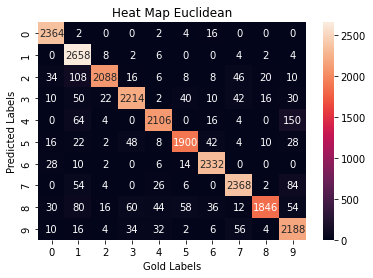

k = 9
Accuracy = 0.9270588235294117
F1-score = 0.9264951201545568


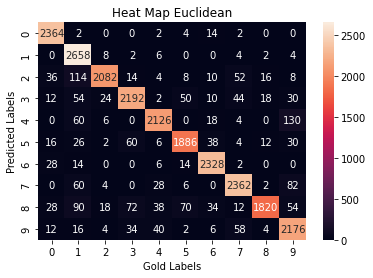

k = 10
Accuracy = 0.9241176470588235
F1-score = 0.92344693874255


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x_train = x1[0:11900]
y_train = y1[0:11900]
x_test = x1[11900:-1]
y_test = y1[11900:-1]

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
y_train = y_train.reshape(y_train.shape[0])

acc_eu = []
f1_eu = []

acc_man = []
f1_man = []

for i in range(0, 10):
  
  neigh2 = KNeighborsClassifier(n_neighbors=i+1, metric= "manhattan")
  predict_cross_valid2 = cross_val_predict(neigh2, x_train, y_train, cv=2)
  target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  acc_man.append(accuracy_score(y_train, predict_cross_valid2))
  classifm = classification_report(y_train, predict_cross_valid2, target_names=target_names, output_dict=True)
  f1 = 0
  for i2 in range(0, 10):
    f1 += classifm[str(i2)]['f1-score']
  f1_man.append(f1/10)

  print("k =", i + 1)
  print("Accuracy =", accuracy_score(y_train, predict_cross_valid2))
  print("F1-score =", f1/10)

  Accuracy, Precision, Recall, F1_score = eval(predict_cross_valid2, actual=y_train, distance="Manhattan", show_heat_map=True)
  
  
for i in range(0, 10):
  neigh = KNeighborsClassifier(n_neighbors=i+1, metric= "euclidean")
  predict_cross_valid = cross_val_predict(neigh, x_train, y_train, cv=2)
  target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  acc_eu.append(accuracy_score(y_train, predict_cross_valid))
  classif = classification_report(y_train, predict_cross_valid, target_names=target_names, output_dict=True)
  f1 = 0
  for i2 in range(0, 10):
    f1 += classif[str(i2)]['f1-score']
  f1_eu.append(f1/10)
  

  Accuracy, Precision, Recall, F1_score = eval(predict_cross_valid, actual=y_train, show_heat_map=True)
  print("k =", i + 1)
  print("Accuracy =", accuracy_score(y_train, predict_cross_valid))
  print("F1-score =", f1/10)



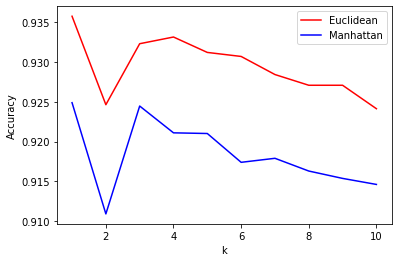

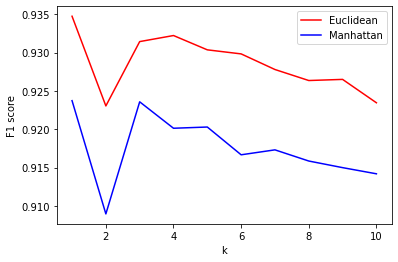

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, acc_eu, color="red")
plt.plot(k, acc_man, color="blue")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(["Euclidean", "Manhattan"])
plt.show()


k = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k, f1_eu, color="red")
plt.plot(k, f1_man, color="blue")
plt.xlabel("k")
plt.ylabel("F1 score")
plt.legend(["Euclidean", "Manhattan"])
plt.show()

In [ ]:
# running sklearn on the complete test dataset


x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
y_train = y_train.reshape(y_train.shape[0])

neigh = KNeighborsClassifier(n_neighbors=1, metric= "euclidean")
neigh.fit(x_train, y_train)
predict = neigh.predict(x_test)


y = np.array(predict).reshape(len(predict), 1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classifm = classification_report(y_test, predict, target_names=target_names, output_dict=True)
f1 = 0
for i2 in range(0, 10):
  f1 += classifm[str(i2)]['f1-score']

print("For Euclidean distance: ")
print("F1_score:", f1/10)
print("Accuracy:", accuracy_score(y_test, predict))
target_names = [0, 1, 2,3, 4, 5, 6, 7, 8, 9]
print(confusion_matrix(y_test, y, labels=target_names))

print("-"*60)


neigh = KNeighborsClassifier(n_neighbors=1, metric= "manhattan")
neigh.fit(x_train, y_train)
predict = neigh.predict(x_test)

y = np.array(predict).reshape(len(predict), 1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classifm = classification_report(y_test, predict, target_names=target_names, output_dict=True)
f1 = 0
for i2 in range(0, 10):
  f1 += classifm[str(i2)]['f1-score']

print("For Manhattan distance: ")
print("F1_score:", f1/10)
print("Accuracy:", accuracy_score(y_test, predict))
target_names = [0, 1, 2,3, 4, 5, 6, 7, 8, 9]
print(confusion_matrix(y_test, y, labels=target_names))

For Euclidean distance: 
F1_score: 0.9459844506923669
Accuracy: 0.9461648404001906
[[210   0   0   0   0   1   0   0   0   0]
 [  0 231   0   0   0   0   0   0   0   0]
 [  1   3 178   2   0   0   1   7   3   0]
 [  0   2   2 214   0  10   0   3   2   3]
 [  1   3   0   0 184   1   0   1   0   7]
 [  1   0   0   6   1 172   2   1   0   3]
 [  1   0   0   0   0   0 194   0   1   0]
 [  0   1   0   0   0   0   0 208   0   2]
 [  1   4   2  10   2   4   3   0 186   3]
 [  0   1   0   0   4   1   0   5   1 209]]
------------------------------------------------------------
For Manhattan distance: 
F1_score: 0.9365066898099567
Accuracy: 0.9366364935683659
[[210   0   0   0   0   1   0   0   0   0]
 [  0 231   0   0   0   0   0   0   0   0]
 [  1   4 178   2   0   0   1   6   3   0]
 [  0   4   2 211   0  11   0   3   3   2]
 [  1   3   0   0 185   0   0   1   0   7]
 [  1   0   0   8   1 171   2   1   0   2]
 [  1   0   0   0   1   2 192   0   0   0]
 [  0   1   0   0   1   0   0 207   0   2